## Observations and Insights 

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [14]:
# Read the mouse data
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [15]:
# Read the study results
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [13]:
# Combine the data into a single dataset
# Display the data table for preview,
data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [29]:
# Checking the number of mice.
mice=data_df["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Checking the number of mice in the clean DataFrame.

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_df = data_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

Tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
Tumor_median = summary_df['Tumor Volume (mm3)'].median()
Tumor_stdev = summary_df['Tumor Volume (mm3)'].std()
Tumor_sem = summary_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_dataframe = pd.DataFrame({'Mean': Tumor_mean, 
                                  'Median': Tumor_median,
                                 'Standard Deviation': Tumor_stdev,
                                  'SEM': Tumor_sem})

summary_dataframe.head()
 

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_mean = data_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean


regimen_median = data_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median


regimen_variance = data_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_variance


regimen_std = data_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = data_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

## Bar and Pie Charts

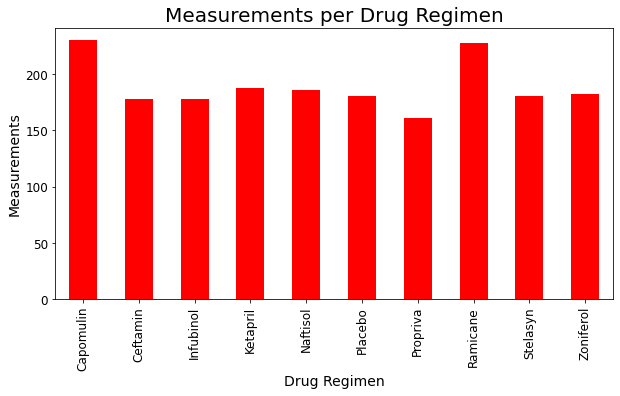

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [44]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

measurements_count = data_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 


plot_pandas = measurements_count.plot.bar(figsize=(10,5), color='r',fontsize = 12)
measurements_count
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Measurements",fontsize = 14)
plt.title("Measurements per Drug Regimen",fontsize = 20)

plt.show()

measurements_count

In [45]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#Number of measurements
measurements_list =(data_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
measurements_list


[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

Text(0.5, 1.0, 'Measurements per Drug Regimen')

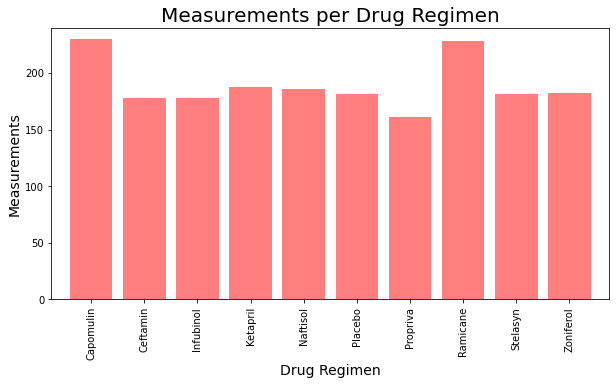

In [48]:
x_axis = np.arange(len(measurements_count))
fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.bar(x_axis, measurements_list, color='r', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(measurements_list)+10)

plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Measurements",fontsize = 14)
plt.title("Measurements per Drug Regimen",fontsize = 20)

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Gender distribution
groupby_gender = data_df.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

# gender_df
mouse_gender


,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


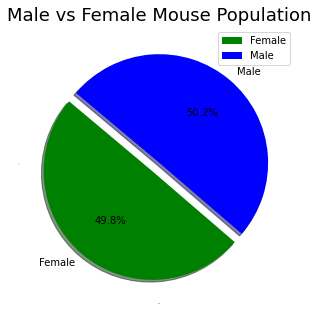

In [53]:
# Pie plot with pandas
colors = ['green', 'blue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(10,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 18)
plt.ylabel('Sex',fontsize = 0)
plt.xlabel("equal",fontsize = 0)

plt.show()

Text(0.5, 0, 'equal')

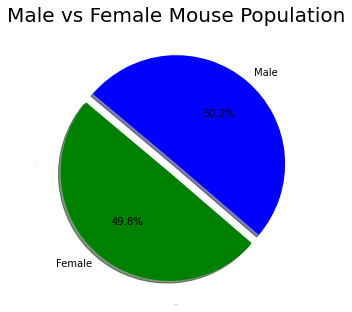

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['green', 'blue']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 0)
#Set equal axis
plt.xlabel("equal",fontsize = 0)


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
